# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [17]:
import sys
print(sys.version)

import pip
installed_packages = pip.get_installed_distributions()
installed_packages_list = sorted(["%s==%s" % (i.key, i.version)
     for i in installed_packages])
print(installed_packages_list)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
['appdirs==1.4.3', 'colorama==0.3.7', 'cycler==0.10.0', 'decorator==4.0.11', 'environment-kernels==1.0', 'ipykernel==4.5.2', 'ipython-genutils==0.1.0', 'ipython==5.1.0', 'ipywidgets==5.2.2', 'jinja2==2.9.4', 'jsonschema==2.5.1', 'jupyter-client==4.4.0', 'jupyter-console==5.0.0', 'jupyter-core==4.2.1', 'jupyter==1.0.0', 'keras==2.0.4', 'markupsafe==0.23', 'matplotlib==2.0.1', 'mistune==0.7.3', 'nbconvert==4.2.0', 'nbformat==4.2.0', 'networkx==1.11', 'notebook==4.3.1', 'numpy==1.12.1', 'olefile==0.44', 'packaging==16.8', 'pandas==0.19.2', 'path.py==0.0.0', 'pickleshare==0.7.4', 'pillow==4.1.1', 'pip==9.0.1', 'prompt-toolkit==1.0.9', 'protobuf==3.3.0', 'pygments==2.1.3', 'pyparsing==2.2.0', 'python-dateutil==2.6.0', 'pytz==2017.2', 'pywavelets==0.5.2', 'pyyaml==3.12', 'pyzmq==16.0.2', 'qtconsole==4.2.1', 'scikit-image==0.13.0', 'scikit-learn==0.18.1', 'scipy==0.18.1', 'setuptools==35.0.2', 'simp

In [18]:
# Load pickled data
import pickle
import os
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from skimage import io, color, exposure, transform
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import backend as K

os.chdir('/Users/drose/Google Drive/mooc/Udacity/sdc/p2/')
# TODO: Fill this in based on where you saved the training and testing data

training_file =   'traffic_data/train.p'
validation_file = 'traffic_data/valid.p'
testing_file =    'traffic_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [19]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = np.shape(y_train)

# TODO: Number of validation examples
n_validation = np.shape(y_valid)

# TODO: Number of testing examples.
n_test = np.shape(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(x_train[1][2])[0],np.shape(x_train[1][2])[0]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.shape(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = (34799,)
Number of testing examples = (12630,)
Image data shape = (32, 32)
Number of classes = (43,)


### Include an exploratory visualization of the dataset

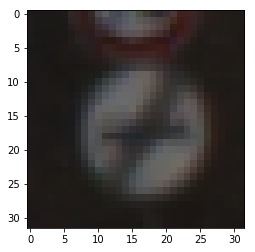

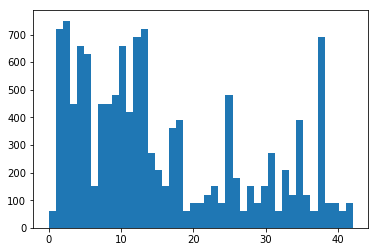

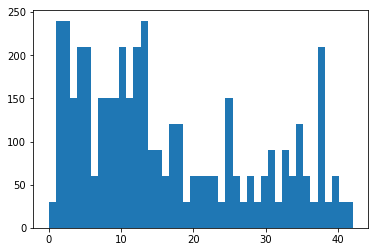

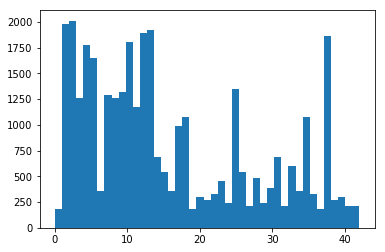

In [20]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.imshow(x_train[0])
plt.show()

plt.hist(y_test, bins=43)
plt.show()
plt.hist(y_valid, bins=43)
plt.show()
plt.hist(y_train, bins=43)
plt.show()



### Pre-process the Data Set (normalization, grayscale, etc.)

In [21]:
def preprocess_img(img):
    # Histogram normalization in y
    #print(np.shape(img))
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

    #central scrop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]

    img = color.rgb2gray(img)
    # rescale to standard size
    #img = transform.resize(img, (IMG_SIZE, IMG_SIZE))
    # roll color axis to axis 0
    #img = np.rollaxis(img,-1)

    return img

In [22]:
np.shape(x_valid)

(4410, 32, 32, 3)

### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

import copy

#x_train2 = copy.copy(x_train)
x_train2 = np.empty([34799, 32, 32])
x_valid2 = np.empty([4410, 32, 32])
x_test2  = np.empty([12630, 32, 32])
#x_train3 = x_train
IMG_SIZE = 32

print(np.shape(x_train2))
plt.imshow(x_train[0])
plt.show()

counter = 0
for sign in x_train:
    #if counter < 1:
    x_train2[counter] = preprocess_img(sign)
    counter = counter + 1

    
counter = 0
for sign in x_valid:
    x_valid2[counter] = preprocess_img(sign)
    counter = counter + 1
    
counter = 0
for sign in x_test:
    x_test2[counter] = preprocess_img(sign)
    counter = counter + 1
    
#x_train2 = preprocess_img(x_train2)
#x_train2[:] = [preprocess_img(imagen) for imagen in x_train]
#np.apply_along_axis(preprocess_img, arr=x_train2, axis = 1)

plt.imshow(x_train2[0])
plt.show()


In [23]:
#np.save('train_2', x_train2)
#np.save('test_2', x_test2)
#np.save('valid_2', x_valid2)

x_train2 = np.load('train_2.npy')
x_test2  = np.load('test_2.npy')
x_valid2 = np.load('valid_2.npy')

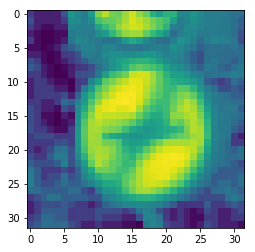

In [24]:
plt.imshow(x_train2[0])
plt.show()


## Augment the Data

### Rotating the images a random amount, return n extra images

In [25]:
from skimage.transform import rotate
def augment_data(x,y,n_extra):

    numOfImg,height,width = x.shape
    x_augmented = np.empty(shape=[numOfImg*n_extra,height,width],dtype=np.float32)
    y_augmented = np.empty(shape=[numOfImg*n_extra],dtype=np.uint8)
    for i in range(numOfImg):
        image = x[i]
        label = y[i]
        x_augmented[i*n_extra] = image
        #print("copying original image to location :",i*augmentationFactor)
        y_augmented[i*n_extra] = y[i]
        for j in range(n_extra-1):
                transformed_img = np.float32(image.shape)
                if np.random.randint(1,10) > 5:
                    rot_ang =  np.random.randint(1,30)
                else:
                    rot_ang = np.random.randint(330,359)
                #rot_M = cv2.getRotationMatrix2D((width/2,height/2),rot_ang,1)
                #rotate image
                #transformed_img = cv2.warpAffine(image,rot_M,(width,height))
                rot_img = rotate(image, rot_ang)
                
                #print("copying image to location :",i*augmentationFactor + j + 1)
                x_augmented[i*n_extra + j + 1] = rot_img
                y_augmented[i*n_extra + j + 1] = label
                
    
    return x_augmented,y_augmented

In [26]:
#x_train3,y_train = augment_data(x_train2,y_train,3)


#np.save('x_train3',x_train3)
#np.save('y_train', y_train)

x_train3_raw = np.load('x_train3.npy')
y_train  = np.load('y_train.npy')

### Model Architecture

In [27]:
in_height = 28.
filter_height = 5.
strides = [1,1,1,1]
#new_height = (input_height - filter_height + 2 * P)/S + 1
out_height = (float(in_height - filter_height + 1) / float(strides[1]))
#new_width = (input_width - filter_width + 2 * P)/S + 1
print(out_height)


24.0


In [28]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def lenet(x):
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID') + conv1_b
     # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    ## SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 24x24x6.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(6))
    conv2   = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    
    # SOLUTION: Layer 2.5: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob=1.)
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    conv2  = flatten(conv2)
    
    

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(conv2, fc1_w) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_w) + fc2_b
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob=1.)
    
    # SOLUTION: Layer 4.5: Fully Connected. Input = 84. Output = 84.
    fc3_w  = tf.Variable(tf.truncated_normal(shape=(84, 84), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(84))
    fc3    = tf.matmul(fc2, fc3_w) + fc3_b
    # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob=.8)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc5_w  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc5_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc5_w) + fc5_b

    return logits


In [29]:
# Functions here courtesy of aruntayal

def conv_layer(input,num_of_input_channel,filter_shape,output_depth,max_pooling='true'):
    mu = 0
    sigma = 0.1
    filter_shape = [filter_shape,filter_shape,num_of_input_channel,output_depth]
    conv_W = tf.Variable(tf.truncated_normal(shape=filter_shape, mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(output_depth))
    cnv_layer   = tf.nn.conv2d(input=input, filter=conv_W, strides=[1, 1, 1, 1], padding='VALID') + conv_b
    
    # RELU for Activation.
    cnv_layer = tf.nn.relu(cnv_layer)
    
    if max_pooling == 'true':
        #Pooling
        cnv_layer = tf.nn.max_pool(cnv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    return cnv_layer
    
def dropout_layer(layer, keep_prob):
    layer_drop = tf.nn.dropout(layer, keep_prob)
    return layer_drop


def full_connection_layer(input,num_of_input,num_of_output,activation = 1):
    mu = 0
    sigma = 0.1
    shape = [num_of_input,num_of_output]
    fc_W = tf.Variable(tf.truncated_normal(shape=shape, mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(num_of_output))
    fc   = tf.matmul(input, fc_W) + fc_b
    
    # RELU for Activation.
    if activation == 1 :
        fc = tf.nn.relu(fc)
    
    return fc

In [30]:
def lenet2(x, keep):
    # Layer 1. Convolutional. Input = 32x32x1. Output = 14x14x6
    cnv_layer_1 = conv_layer(x,1,5,16,max_pooling='false')
    
    cnv_layer_2 = conv_layer(cnv_layer_1,16,5,32,max_pooling='false')
    cnv_layer_3 = conv_layer(cnv_layer_2,32,5,64,max_pooling='false')
    drop_layer_1 = dropout_layer(cnv_layer_3, keep)
    
    cnv_layer_4 = conv_layer(drop_layer_1,64,5,128)
    
    fc_1 = flatten(cnv_layer_4)
    fc_1 = full_connection_layer(fc_1,8192,1024)
    
    fc_2 = full_connection_layer(fc_1,1024,256)
    
    fc_3 = full_connection_layer(fc_2,256,43,activation=0)
    drop_layer_3 = dropout_layer(fc_3, keep)
    return drop_layer_3

In [31]:
np.shape(x_train3_raw)

(104397, 32, 32)

### Train, Validate and Test the Model

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x_input')
    y = tf.placeholder(tf.int32, (None), name='y_input')
    one_hot_y = tf.one_hot(y, 43, name='one_hot_y')
#keep_prob = tf.placeholder(tf.float32, [])
#keep_prob = .7
mu = 0
sigma = 0.1
rate = 0.0005
#from keras import backend as K
#K.set_image_dim_ordering('tf')
keep = tf.placeholder(tf.float32,[])

logits = lenet2(x, keep)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [35]:
print('size before: ', np.shape(x_train3_raw))

x_train3 = np.expand_dims(x_train3_raw, axis=3)
x_valid3 = np.expand_dims(x_valid2, axis=3)

print('size after: ', np.shape(x_train3))


size before:  (104397, 32, 32)
size after:  (104397, 32, 32, 1)


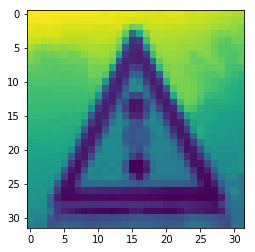

In [36]:
plt.imshow(x_train3[4998,:,:,0])
plt.show()

# Train the Model

In [37]:
EPOCHS = 7
BATCH_SIZE = 150

from sklearn.utils import shuffle

#x_train3 = np.expand_dims(x_train2, axis=1)

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train2)
    
    # Craete log writer object
    logs_path = 'log/'
    writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    train_acc = []
    valid_acc = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train3, y_train = shuffle(x_train3, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train3[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep:.6})
            
        training_accuracy = evaluate(x_train3,y_train)
        validation_accuracy = evaluate(x_valid3, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))        
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        train_acc.append(training_accuracy)
        valid_acc.append(validation_accuracy)
        x_test3 = np.expand_dims(x_test2, axis=3)
        test_accuracy = evaluate(x_test3, y_test)

    print("Test Accuracy = {:.3f}".format(test_accuracy))
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.741
Validation Accuracy = 0.781

EPOCH 2 ...
Training Accuracy = 0.864
Validation Accuracy = 0.865

EPOCH 3 ...
Training Accuracy = 0.919
Validation Accuracy = 0.900

EPOCH 4 ...
Training Accuracy = 0.931
Validation Accuracy = 0.912

EPOCH 5 ...
Training Accuracy = 0.949
Validation Accuracy = 0.924

EPOCH 6 ...
Training Accuracy = 0.965
Validation Accuracy = 0.941

EPOCH 7 ...
Training Accuracy = 0.965
Validation Accuracy = 0.944

Test Accuracy = 0.921
Model saved


In [38]:
np.shape(x_test2)

(12630, 32, 32)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [39]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from PIL import Image
import glob
x_new = []
for filename in glob.glob('new_5/*.jpg'): #assuming jpg
    im=Image.open(filename)
    x_new.append(im)

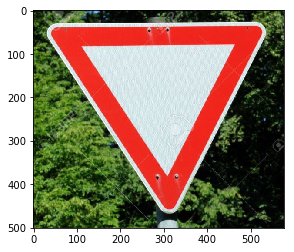

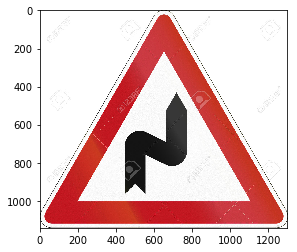

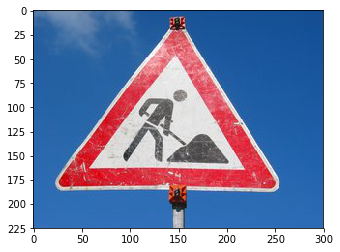

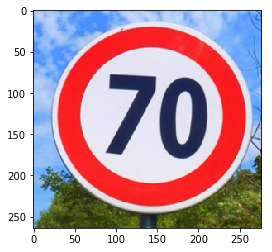

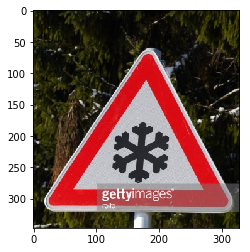

In [40]:
for i in range(5):
    plt.imshow(x_new[i])
    plt.show()

### Predict the Sign Type for Each Image

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflec

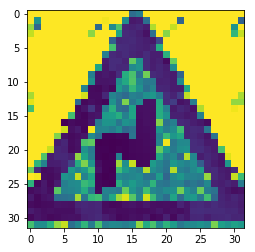

INFO:tensorflow:Restoring parameters from .\lenet


In [57]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def preprocess_img(img):
    # Histogram normalization in y
    #print(np.shape(img))
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

    #central crop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]

    img = color.rgb2gray(img)
    
    # rescale to standard size
    IMG_SIZE = 32
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))
    # roll color axis to axis 0
    #img = np.rollaxis(img,-1)

    return img

#x_train2 = copy.copy(x_train)
x_new2 = np.empty([5, 32, 32])

counter = 0
for sign in x_new:
    #if counter < 1:
    x_new2[counter] = preprocess_img(sign)
    counter = counter + 1
    
plt.imshow(x_new2[1])
plt.show()


x_new3 = np.expand_dims(x_new2, axis=3)
y_new = [13,21,25,4,23]

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_test_accuracy = evaluate(x_new3, y_new)

### Analyze Performance

In [66]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print("New Test Data Accuracy = {:.3f}".format(new_test_accuracy))


New Test Data Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [59]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

logits = lenet2(x, keep = 1.)
y_pred = tf.nn.softmax(logits)
tf_probs = tf.nn.top_k(y_pred,k=5)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    #sess.restore(sess, tf.train.latest_checkpoint('.'))
    feed_dict = {x: x_new3, y: y_new}
    top_5_prob = sess.run(tf_probs, feed_dict=feed_dict)

INFO:tensorflow:Restoring parameters from .\lenet


In [60]:
import pandas as pd

names = pd.read_csv('CarND-Traffic-Sign-Classifier-Project/signnames.csv', delimiter=',')

Image  0


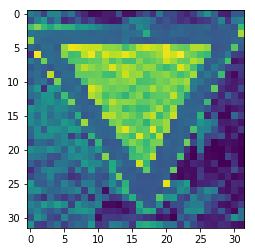

Probabilities:
1 :  Double curve 0.931545
2 :  Speed limit (80km/h) 0.0643561
3 :  No passing for vehicles over 3.5 metric tons 0.00408106
4 :  Wild animals crossing 1.4956e-05
5 :  End of all speed and passing limits 9.77684e-07
Image  1


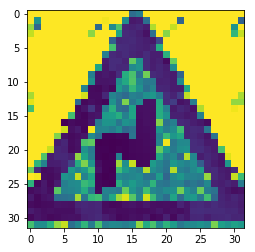

Probabilities:
1 :  Double curve 0.999779
2 :  No passing for vehicles over 3.5 metric tons 0.000211025
3 :  Speed limit (80km/h) 9.87119e-06
4 :  Dangerous curve to the right 8.32696e-09
5 :  Ahead only 4.39636e-09
Image  2


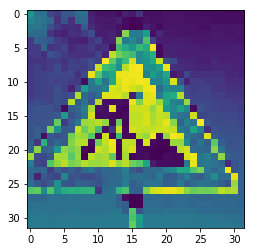

Probabilities:
1 :  Double curve 0.999988
2 :  No passing for vehicles over 3.5 metric tons 1.12904e-05
3 :  Go straight or left 2.01945e-07
4 :  Speed limit (80km/h) 7.71859e-09
5 :  End of no passing 7.01678e-09
Image  3


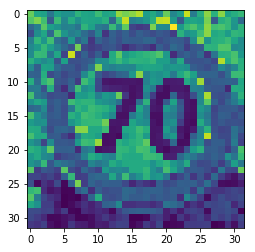

Probabilities:
1 :  No passing for vehicles over 3.5 metric tons 0.734856
2 :  Double curve 0.264369
3 :  End of no passing 0.000436071
4 :  Speed limit (80km/h) 0.000308796
5 :  Wild animals crossing 1.3751e-05
Image  4


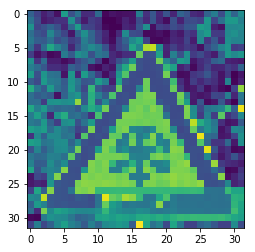

Probabilities:
1 :  Double curve 0.996778
2 :  No passing for vehicles over 3.5 metric tons 0.00311182
3 :  No entry 9.51355e-05
4 :  Go straight or left 5.567e-06
5 :  Speed limit (80km/h) 3.93932e-06


In [61]:
for i in range(5):
    print('Image ',i)
    plt.imshow(x_new2[i])
    plt.show()
    print('Probabilities:')
    for ii in range(5):
        namez = names['SignName'][top_5_prob[1][i][ii]]
        probz = top_5_prob[0][i][ii]
        
        print(ii + 1,": ",namez,probz)
        #print(top_5_pred[0][i][ii])
    

In [65]:
print(top_5_prob[1][0])
      
print(top_5_prob[0][0])


[21  5 10 31 32]
[  9.31544781e-01   6.43560812e-02   4.08105506e-03   1.49560437e-05
   9.77684181e-07]


Speed limit (100km/h)


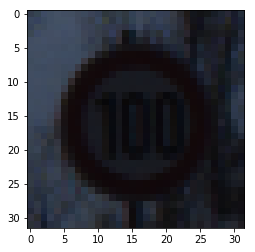

In [31]:
p=40

print(names['SignName'][y_test[p]])
plt.imshow(x_test[p])
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")